In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Kobe Bryant  shot selection

Cсылка на соревнование: https://www.kaggle.com/c/kobe-bryant-shot-selection

Goal: Fun and education

Using 20 years of data on Kobe's swishes and misses, can you predict which shots will find the bottom of the net? This competition is well suited for practicing classification basics, feature engineering, and time series analysis. Practice got Kobe an eight-figure contract and 5 championship rings. What will it get you?

This data contains the location and circumstances of every field goal attempted by Kobe Bryant took during his 20-year career. Your task is to predict whether the basket went in (shot_made_flag).

We have removed 5000 of the shot_made_flags (represented as missing values in the csv file). These are the test set shots for which you must submit a prediction. You are provided a sample submission file with the correct shot_ids needed for a valid prediction.

In [2]:
data_kobe = pd.read_csv('data/Kobe.csv')

In [3]:
data = data_kobe.dropna()

In [4]:
data.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5
5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,6


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25697 entries, 1 to 30696
Data columns (total 25 columns):
action_type           25697 non-null object
combined_shot_type    25697 non-null object
game_event_id         25697 non-null int64
game_id               25697 non-null int64
lat                   25697 non-null float64
loc_x                 25697 non-null int64
loc_y                 25697 non-null int64
lon                   25697 non-null float64
minutes_remaining     25697 non-null int64
period                25697 non-null int64
playoffs              25697 non-null int64
season                25697 non-null object
seconds_remaining     25697 non-null int64
shot_distance         25697 non-null int64
shot_made_flag        25697 non-null float64
shot_type             25697 non-null object
shot_zone_area        25697 non-null object
shot_zone_basic       25697 non-null object
shot_zone_range       25697 non-null object
team_id               25697 non-null int64
team_name         

In [6]:
data.corr()["shot_made_flag"].sort_values()

shot_distance       -0.198242
loc_y               -0.148070
game_event_id       -0.037232
period              -0.032152
shot_id             -0.013016
game_id             -0.001612
playoffs            -0.001257
lon                 -0.000848
loc_x               -0.000848
minutes_remaining    0.028342
seconds_remaining    0.030804
lat                  0.148070
shot_made_flag       1.000000
team_id                   NaN
Name: shot_made_flag, dtype: float64

Особых корреляций между целевой переменной и текущими не наблюдается.

D:\Netology\Anaconda\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
D:\Netology\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


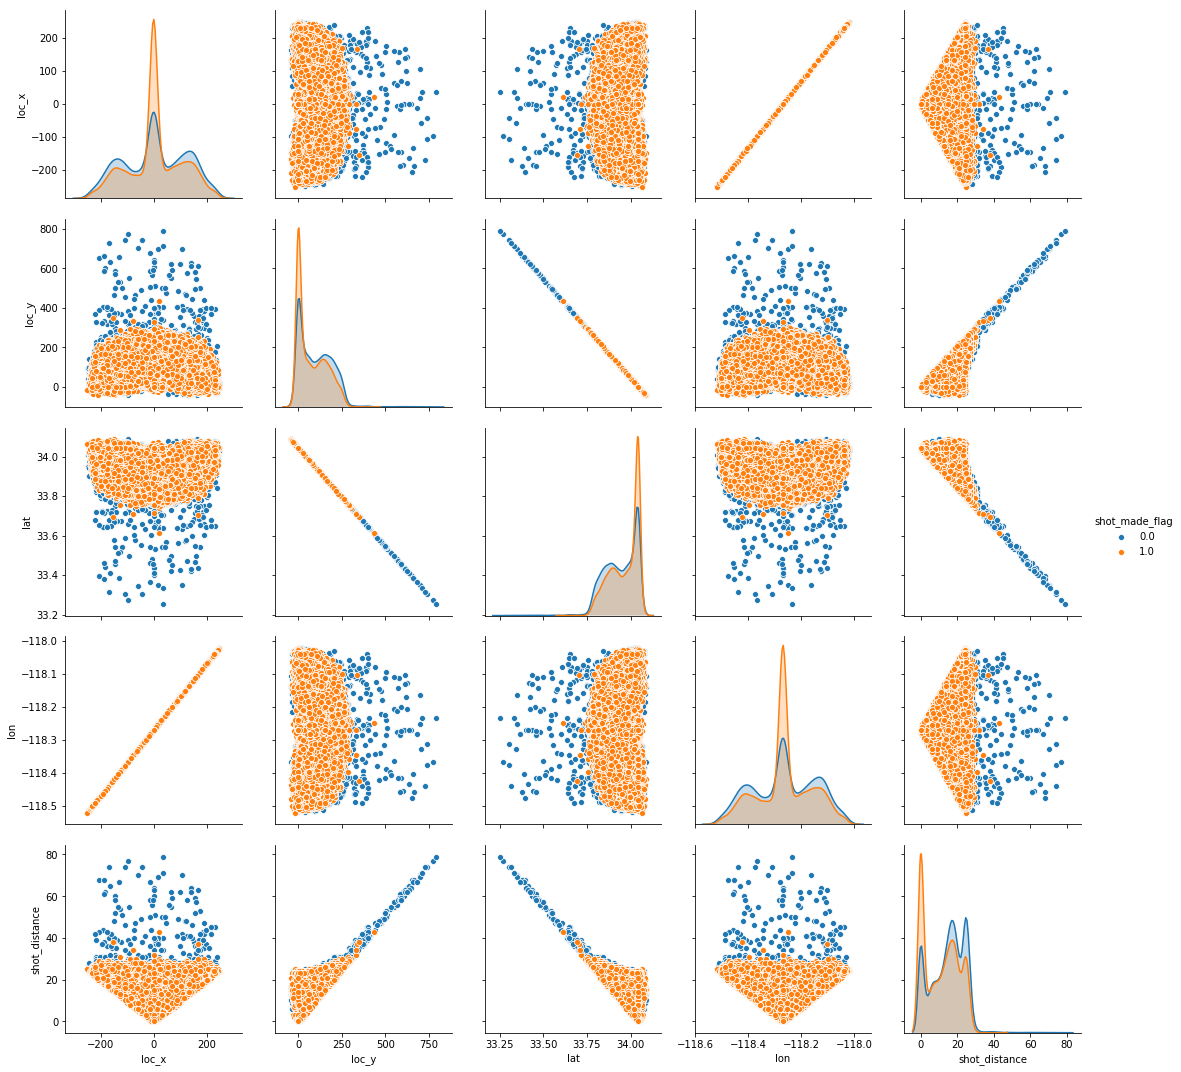

In [7]:
_=sns.pairplot(data, vars=['loc_x','loc_y','lat','lon','shot_distance'],hue='shot_made_flag',size=3)

In [8]:
data.shot_made_flag.value_counts(dropna=False)

0.0    14232
1.0    11465
Name: shot_made_flag, dtype: int64

Text(0.5,1,'Промах')

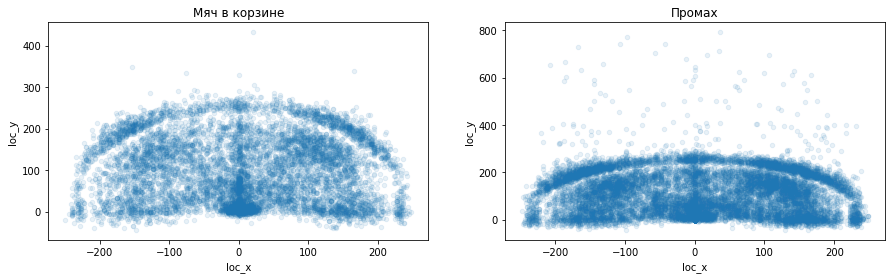

In [9]:
fig, (ax1,ax2) = plt.subplots(1,2)
fig.set_figwidth(15)
_ = data[data.shot_made_flag==1].plot(kind="scatter", x="loc_x", y="loc_y", alpha=0.1,  ax=ax1)
ax1.set_title("Мяч в корзине")
_ = data[data.shot_made_flag==0].plot(kind="scatter", x="loc_x", y="loc_y", alpha=0.1,ax=ax2)
ax2.set_title("Промах")

Text(0.5,1,'Промах')

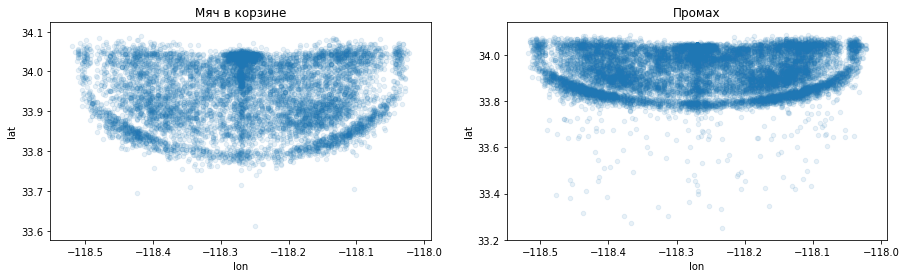

In [10]:
fig, (ax1,ax2) = plt.subplots(1,2)
fig.set_figwidth(15)
_ = data[data.shot_made_flag==1].plot(kind="scatter", x="lon", y="lat", alpha=0.1,  ax=ax1)
ax1.set_title("Мяч в корзине")
_ = data[data.shot_made_flag==0].plot(kind="scatter", x="lon", y="lat", alpha=0.1,ax=ax2)
ax2.set_title("Промах")

Переменные loc_x, loc_y, lon ,lat - характеризуют положения Kobe перед броском на поле, исходя из этих перемнных можно найти угол броска и расстояние до корзины (более точный показатель, чем shot_distance)

In [11]:
data['dist']=np.sqrt(data['loc_x']**2+data['loc_y']**2)
data['angel']=data.apply(lambda row: np.arctan(row.loc_y/row.loc_x) if row.loc_x!=0 else np.pi/2,axis=1)

D:\Netology\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\Netology\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Удалим все выбросы из фичи расстояние

In [12]:
def detect_outliers(series, whis=1.5):
    q75, q25 = np.percentile(series, [75 ,25])
    iqr = q75 - q25
    return ~((series - series.median()).abs() <= (whis * iqr))

In [13]:
list_outl=data.dist[detect_outliers(data.dist)].index.tolist()
data.drop(list_outl,axis=0,inplace=True)

D:\Netology\Anaconda\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [14]:
data[['dist','shot_distance']].corr()

,dist,shot_distance
dist,1.00000,0.99947
shot_distance,0.99947,1.00000


Shot_distance мы удалим из набора. У них почти единичная корреляиция с фичей dist (не единичная из-за погрешности измерения)

In [16]:
data.team_name.value_counts()

Los Angeles Lakers    25602
Name: team_name, dtype: int64

In [17]:
data.team_id.value_counts()

1610612747    25602
Name: team_id, dtype: int64

team_id и team_name одинаковые для всего датасета, их можно удалить из данных

In [18]:
data.game_id.value_counts().head()

21501228    43
20601081    41
20500591    39
20200069    38
20700553    37
Name: game_id, dtype: int64

In [19]:
data.opponent.value_counts()

SAS    1634
PHX    1525
HOU    1395
SAC    1392
DEN    1348
POR    1283
UTA    1233
MIN    1217
GSW    1141
LAC    1071
DAL    1027
MEM     867
BOS     780
SEA     689
IND     620
ORL     604
PHI     601
DET     583
NYK     565
OKC     559
TOR     554
MIA     517
CLE     513
CHI     513
MIL     506
WAS     501
CHA     500
NOH     473
ATL     437
NJN     419
NOP     287
VAN     203
BKN      45
Name: opponent, dtype: int64

In [20]:
data.matchup.value_counts().head()

LAL @ SAS      852
LAL vs. SAS    762
LAL @ PHX      747
LAL @ SAC      746
LAL vs. HOU    721
Name: matchup, dtype: int64

In [21]:
data[['matchup','opponent']].head(5)

,matchup,opponent
1,LAL @ POR,POR
2,LAL @ POR,POR
3,LAL @ POR,POR
4,LAL @ POR,POR
5,LAL @ POR,POR


Поля matchup и opponent обозначают одно и тоже - команду противника, оставим только поле opponent, т.к. в столбце matchup встречается разичное написание.

In [22]:
data.shot_zone_range.value_counts()

Less Than 8 ft.    7857
16-24 ft.          6907
8-16 ft.           5580
24+ ft.            5258
Name: shot_zone_range, dtype: int64

In [23]:
data.shot_zone_area.value_counts()

Center(C)                11284
Right Side Center(RC)     3971
Right Side(R)             3859
Left Side Center(LC)      3356
Left Side(L)              3132
Name: shot_zone_area, dtype: int64

In [24]:
data.shot_zone_basic.value_counts()

Mid-Range                10532
Restricted Area           5932
Above the Break 3         4685
In The Paint (Non-RA)     3880
Right Corner 3             333
Left Corner 3              240
Name: shot_zone_basic, dtype: int64

shot_zone_range, shot_zone_area, shot_zone_basic - это фактически расстояние до корзины и угол броска, которые мы уже учли. Поэтому от этих переменной можно отказаться.

In [25]:
import datetime
def get_date_year(data_):
    return datetime.datetime.strptime(data_,"%Y-%m-%d").year    
def get_date_month(data_):
    return datetime.datetime.strptime(data_,"%Y-%m-%d").strftime("%B")  

In [26]:
data["game_date_year"],data["game_date_month"] = [data.apply(lambda row: get_date_year(row.game_date),axis=1),
                                                 data.apply(lambda row: get_date_month(row.game_date),axis=1)]

D:\Netology\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [27]:
data['times_remainig']=data.apply(lambda row: row.minutes_remaining*60+row.seconds_remaining,axis=1)

D:\Netology\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


После содания фичи times_remainig(время оставшиеся до конца периода в секундах) мы можем удалить minutes_remaining и seconds_remaining.    
Также удалим технические поля, такие как game_event_id,game_id. shot_id будем использовать для деления на test и train датасеты.

In [28]:
data.period.value_counts()

3    6972
1    6669
4    6039
2    5605
5     280
6      30
7       7
Name: period, dtype: int64

Периоды 5,6,7 уберем в период 5.

In [29]:
data.loc[data.period>5,'period']=5

D:\Netology\Anaconda\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [30]:
data.period.value_counts()

3    6972
1    6669
4    6039
2    5605
5     317
Name: period, dtype: int64

In [31]:
data.action_type.value_counts().head(15).index

Index(['Jump Shot', 'Layup Shot', 'Driving Layup Shot', 'Turnaround Jump Shot',
       'Fadeaway Jump Shot', 'Running Jump Shot', 'Pullup Jump shot',
       'Turnaround Fadeaway shot', 'Slam Dunk Shot', 'Reverse Layup Shot',
       'Jump Bank Shot', 'Driving Dunk Shot', 'Dunk Shot', 'Tip Shot',
       'Step Back Jump shot'],
      dtype='object')

In [32]:
def get_action_type_cat(row_):
    main_cat = ['Jump Shot', 'Layup Shot', 'Driving Layup Shot', 'Turnaround Jump Shot',
       'Fadeaway Jump Shot', 'Running Jump Shot', 'Pullup Jump shot',
       'Turnaround Fadeaway shot', 'Slam Dunk Shot', 'Reverse Layup Shot',
       'Jump Bank Shot', 'Driving Dunk Shot', 'Dunk Shot','Tip Shot','Step Back Jump shot']
    if row_ not in main_cat:
        return 'Other'
    else:
        return row_

In [33]:
data['new_action_type']=data.apply(lambda row: get_action_type_cat(row.action_type),axis=1)

D:\Netology\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
data.new_action_type.value_counts()

Jump Shot                   15745
Layup Shot                   2154
Driving Layup Shot           1628
Other                        1082
Turnaround Jump Shot          891
Fadeaway Jump Shot            872
Running Jump Shot             775
Pullup Jump shot              402
Turnaround Fadeaway shot      366
Slam Dunk Shot                334
Reverse Layup Shot            333
Jump Bank Shot                289
Driving Dunk Shot             257
Dunk Shot                     217
Tip Shot                      151
Step Back Jump shot           106
Name: new_action_type, dtype: int64

In [35]:
data.combined_shot_type.value_counts()

Jump Shot    19615
Layup         4532
Dunk          1056
Tip Shot       152
Hook Shot      127
Bank Shot      120
Name: combined_shot_type, dtype: int64

In [36]:
data.shot_type.value_counts()

2PT Field Goal    20284
3PT Field Goal     5318
Name: shot_type, dtype: int64

In [37]:
data.season.value_counts().head()

2005-06    1919
2008-09    1848
2002-03    1842
2007-08    1814
2009-10    1766
Name: season, dtype: int64

In [38]:
data.playoffs.value_counts()

0    21859
1     3743
Name: playoffs, dtype: int64

Данная фича описана  game_date_year и game_date_month

In [39]:
data.drop(["team_id","team_name","minutes_remaining",
           "seconds_remaining","matchup",
           "game_event_id","game_id","game_date",
           "shot_distance","lon","lat","loc_x","loc_y","shot_zone_range",
           "shot_zone_area","shot_zone_basic","action_type","season"],axis=1,inplace=True)

D:\Netology\Anaconda\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [40]:
data.head()

,combined_shot_type,period,playoffs,shot_made_flag,shot_type,opponent,shot_id,dist,angel,game_date_year,game_date_month,times_remainig,new_action_type
1,Jump Shot,1,0,0.0,2PT Field Goal,POR,2,157.000000,-0.000000,2000,October,622,Jump Shot
2,Jump Shot,1,0,1.0,2PT Field Goal,POR,3,168.600119,-0.928481,2000,October,465,Jump Shot
3,Jump Shot,1,0,0.0,2PT Field Goal,POR,4,222.865430,0.903063,2000,October,412,Jump Shot
4,Dunk,2,0,1.0,2PT Field Goal,POR,5,0.000000,1.570796,2000,October,379,Driving Dunk Shot
5,Jump Shot,3,0,0.0,2PT Field Goal,POR,6,145.416643,0.075717,2000,October,572,Jump Shot


Разделим датасет на train и test

In [41]:
ind_data_test = np.random.choice(data.shot_id.unique(), size=5000, replace=False)
ind_data_test = set(ind_data_test)

In [42]:
# create dataset for train
data_train = data[~data.shot_id.isin(ind_data_test)].copy()
print("Всего бросков в train датасете: ", len(data_train))
# create dataset for test
data_test = data[data.shot_id.isin(ind_data_test)].copy()
print("Всего бросков в test датасете: ", len(data_test))

Всего бросков в train датасете:  20602
Всего бросков в test датасете:  5000


In [43]:
def get_one_hot(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode 
    @return a DataFrame with one-hot encoding
    """
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
    return df

In [44]:
def get_counts(df_train, df_test, col, target_col):
    category_val_dict = (
        df_train[df_train[target_col] == 1][col].value_counts()
        /
        df_train[col].value_counts()
    ).to_dict()
    df_train[col + '_counts'] = df_train[col].apply(category_val_dict.get)
    df_test[col + '_counts'] = df_test[col].apply(category_val_dict.get)
    return df_train, df_test

In [45]:
data_train=get_one_hot(data_train,['period','combined_shot_type','shot_type','new_action_type','game_date_month','game_date_year'])
data_test=get_one_hot(data_test,['period','combined_shot_type','shot_type','new_action_type','game_date_month','game_date_year'])

In [46]:
get_counts(data_train,data_test,'opponent','shot_made_flag')
get_counts(data_test,data_test,'opponent','shot_made_flag')

(      combined_shot_type  period  playoffs  shot_made_flag       shot_type  \
 3              Jump Shot       1         0             0.0  2PT Field Goal   
 12             Jump Shot       1         0             1.0  2PT Field Goal   
 17             Jump Shot       2         0             1.0  3PT Field Goal   
 28             Jump Shot       4         0             0.0  2PT Field Goal   
 42             Jump Shot       3         0             1.0  2PT Field Goal   
 52             Jump Shot       1         0             0.0  2PT Field Goal   
 53             Jump Shot       1         0             0.0  2PT Field Goal   
 60             Jump Shot       2         0             0.0  2PT Field Goal   
 72                 Layup       2         0             1.0  2PT Field Goal   
 73             Jump Shot       2         0             0.0  2PT Field Goal   
 89             Jump Shot       1         0             1.0  2PT Field Goal   
 107            Jump Shot       4         0         

In [47]:
data_train.drop(['shot_id','period','combined_shot_type',
                 'shot_type','new_action_type','game_date_month','game_date_year','opponent'],inplace=True,axis=1)
data_test.drop(['shot_id','period','combined_shot_type',
                 'shot_type','new_action_type','game_date_month','game_date_year','opponent'],inplace=True,axis=1)

In [48]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

In [49]:
x_train = data_train.drop(['shot_made_flag'],axis=1).as_matrix()
y_train = data_train.shot_made_flag

x_test = data_test.drop(['shot_made_flag'],axis=1).as_matrix()
y_test = data_test.shot_made_flag

D:\Netology\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
D:\Netology\Anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


## Обычная регрессия

In [50]:
lm = LinearRegression().fit(x_train, y_train)

In [51]:
col = ['rss', 'intercept'] + data_train.drop(['shot_made_flag'],axis=1).columns.tolist()
ind = ['lm','Ridge','Lasso']
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)
roc_auc_pd=pd.DataFrame(index=['Linear','Ridge','Lasso'], columns=['Train','Test'])

In [52]:
y_pred_train=lm.predict(x_train)
y_pred_test=lm.predict(x_test)
rss = sum((y_pred_train - data_train['shot_made_flag']) ** 2)
ret = [rss]
ret.extend([lm.intercept_])
ret.extend(lm.coef_)
coef_matrix_simple.iloc[0,:]=ret

In [53]:
roc_auc_train = np.round(roc_auc_score(y_train, y_pred_train), 2)
roc_auc_test = np.round(roc_auc_score(y_test, y_pred_test), 2)
roc_auc_pd.iloc[0,:]=[roc_auc_train,roc_auc_test]

## Ridge регрессия

In [54]:
rg = Ridge(alpha=1).fit(x_train, y_train)

In [55]:
y_pred_train=rg.predict(x_train)
y_pred_test=rg.predict(x_test)
rss = sum((y_pred_train - y_train) ** 2)
ret = [rss]
ret.extend([rg.intercept_])
ret.extend(rg.coef_)
coef_matrix_simple.iloc[1,:]=ret

In [56]:
roc_auc_train = np.round(roc_auc_score(y_train, y_pred_train), 2)
roc_auc_test = np.round(roc_auc_score(y_test, y_pred_test), 2)
roc_auc_pd.iloc[1,:]=[roc_auc_train,roc_auc_test]

## Lasso регрессия

In [58]:
ls = Lasso().fit(x_train, y_train)

In [60]:
y_pred_train=ls.predict(x_train)
y_pred_test=ls.predict(x_test)
rss = sum((y_pred_train - y_train) ** 2)
ret = [rss]
ret.extend([ls.intercept_])
ret.extend(ls.coef_)
coef_matrix_simple.iloc[2,:]=ret

In [61]:
pd.options.display.float_format = '{:.4g}'.format
coef_matrix_simple.loc['Lasso'][coef_matrix_simple.loc['Lasso']!=0]

rss                    4910
intercept            0.5712
dist             -0.0009303
times_remainig    2.432e-05
Name: Lasso, dtype: object

In [62]:
roc_auc_train = np.round(roc_auc_score(y_train, y_pred_train), 2)
roc_auc_test = np.round(roc_auc_score(y_test, y_pred_test), 2)
roc_auc_pd.iloc[2,:]=[roc_auc_train,roc_auc_test]

In [63]:
coef_matrix_simple

,rss,intercept,playoffs,dist,angel,times_remainig,period_1,period_2,period_3,period_4,...,game_date_year_2008,game_date_year_2009,game_date_year_2010,game_date_year_2011,game_date_year_2012,game_date_year_2013,game_date_year_2014,game_date_year_2015,game_date_year_2016,opponent_counts
lm,4344,0.3253,-0.02581,0.0004794,0.007201,5.388e-05,0.023,0.004674,0.00576,-0.01969,...,0.02912,0.03385,0.01004,0.0084,-0.01179,-0.03304,-0.05816,-0.07939,-0.101,0.4878
Ridge,4344,0.3541,-0.02605,0.000479,0.0072,5.383e-05,0.02299,0.004653,0.005759,-0.01971,...,0.02911,0.03368,0.009755,0.008332,-0.01189,-0.0334,-0.05785,-0.07944,-0.1011,0.4247
Lasso,4910,0.5712,-0,-0.0009303,0,2.432e-05,0,-0,0,-0,...,0,0,0,0,-0,-0,-0,-0,-0,0


In [64]:
roc_auc_pd

,Train,Test
Linear,0.7,0.69
Ridge,0.7,0.69
Lasso,0.61,0.61


Вывод:   
    Ridge ресгрессия немного уменьшила коэффициенты    
    Lasso занулила большую часть коффициентов (как не значимые), оставив только расстояние до корзины и время до конца периода,     rss при этом немного увелиилось, а качество модели ухудшилось

**Задания:**

1. Провести анализ данных. Много хороших примеров анализа можно посмотреть здесь https://www.kaggle.com/c/kobe-bryant-shot-selection/kernels
2. Подготовить фичи для обучения модели - нагенерить признаков, обработать пропущенные значения, проверить на возможные выбросы, обработать категориальные признаки и др.
3. Обучить линейную модель, Lasso, Ridge на тех же признаках - построить сравнительную таблицу коэффициентов, сделать заключения о том, как меняется величина коэффициентов, какие зануляются. Посчитать RSS

**Дополнительно**
4. Сравнить результаты на тестовом наборе данных - сделать train_test_split в самом начале, подготовить переменные, сравнить результаты работы классификаторов (те же 3), метрика ROC AUC